In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf

In [287]:
county_PopulationEstimates = pd.read_csv(r'/Users/giomarrero/Desktop/final_data_clean/county_PopulationEstimates.csv')
housing_type_rename = pd.read_csv(r'/Users/giomarrero/Desktop/final_data_clean/housing_type_rename.csv')
occupancy_status_county = pd.read_csv(r'/Users/giomarrero/Desktop/final_data_clean/occupancy_status_county.csv')
RDC_Inventory_Core_Metrics_County_History = pd.read_csv(r'/Users/giomarrero/Desktop/final_data_clean/RDC_Inventory_Core_Metrics_County_History.csv')
RDC_Inventory_Hotness_Metrics_County_History = pd.read_csv(r'/Users/giomarrero/Desktop/final_data_clean/RDC_Inventory_Hotness_Metrics_County_History.csv')
urban_rural_by_county = pd.read_csv(r'/Users/giomarrero/Desktop/final_data_clean/urban_rural_by_county.csv')
us_cci_data = pd.read_csv(r'/Users/giomarrero/Desktop/final_data_clean/us_cci_data.csv')

/tmp/ipykernel_7633/386257140.py:4: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  RDC_Inventory_Core_Metrics_County_History = pd.read_csv(r'/Users/giomarrero/Desktop/final_data_clean/RDC_Inventory_Core_Metrics_County_History.csv')
/tmp/ipykernel_7633/386257140.py:5: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  RDC_Inventory_Hotness_Metrics_County_History = pd.read_csv(r'/Users/giomarrero/Desktop/final_data_clean/RDC_Inventory_Hotness_Metrics_County_History.csv')


In [288]:
county_PopulationEstimates = county_PopulationEstimates.drop(0, axis='index')

In [289]:
county_PopulationEstimates

,county_fips,POP_ESTIMATE_2022
1,1000,"5,074,296"
2,1001,"59,759"
3,1003,"246,435"
4,1005,"24,706"
5,1007,"22,005"
...,...,...
3278,72145,"53,684"
3279,72147,"8,043"
3280,72149,"21,466"
3281,72151,"29,305"


In [290]:
county_PopulationEstimates['POP_ESTIMATE_2022'] = county_PopulationEstimates['POP_ESTIMATE_2022'].str.replace(',','')
county_PopulationEstimates_NANfree = county_PopulationEstimates.dropna()
county_PopulationEstimates_NANfree = county_PopulationEstimates_NANfree.astype(int)

<Axes: title={'center': 'Population Estimate 2022'}>

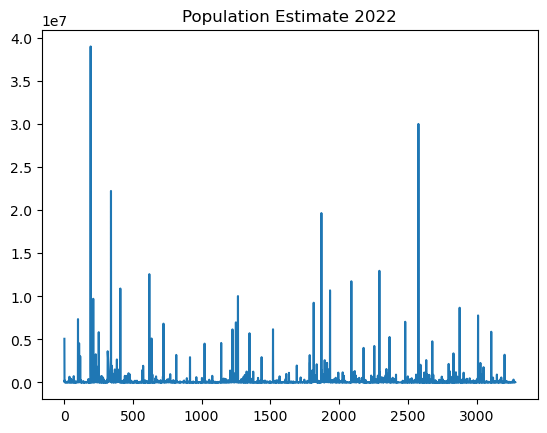

In [291]:
county_PopulationEstimates_NANfree['POP_ESTIMATE_2022'].plot(y = "Population Estimate", title = "Population Estimate 2022")
# Below is a plot of our 2022 Population Estimates for all of our counties.

In [292]:
housing_type_rename
new_header = housing_type_rename.iloc[0] #grab the first row for the header
housing_type_rename = housing_type_rename[1:] #take the data less the header row
housing_type_rename.columns = new_header #set the header row as the df header

In [293]:
housing_type_rename.drop(housing_type_rename.columns[[3, 5, 7, 8, 9, 11, 13, 15, 17, 19, 20]], axis=1, inplace = True)
housing_type_rename.rename(columns = {' !!Total:':'Total'}, inplace = True)
housing_type_rename.rename(columns = {' !!Total:!!Family households:':'Total: Family Households'}, inplace = True)
housing_type_rename.rename(columns = {' !!Total:!!Family households:!!Other family:!!Male householder, no spouse present':'Total: Family Households, Other Family, Male Householder, No Spouse'}, inplace = True)
housing_type_rename.rename(columns = {' !!Total:!!Family households:!!Other family:!!Female householder, no spouse present':'Total: Family Households, Other Family, Female Householder, No Spouse'}, inplace = True)
housing_type_rename.rename(columns = {' !!Total:!!Nonfamily households:':'Total: Nonfamily Households'}, inplace = True)
housing_type_rename.rename(columns = {' !!Total:!!Nonfamily households:!!Householder living alone':'Total: Nonfamily Households - Homeowner Lives Alone'}, inplace = True)
housing_type_rename.rename(columns = {' !!Total:!!Nonfamily households:!!Householder not living alone':'Total: Nonfamily Households - Homeowner Does NOT Lives Alone'}, inplace = True)
housing_type_rename.rename(columns = {' !!Total:!!Family households:!!Married couple family':'Total: Family Households - Married Couple Family'}, inplace = True)

In [294]:
housing_type_rename

,Geography,Geographic Area Name,Total,Total: Family Households,Total: Family Households - Married Couple Family,"Total: Family Households, Other Family, Male Householder, No Spouse","Total: Family Households, Other Family, Female Householder, No Spouse",Total: Nonfamily Households,Total: Nonfamily Households - Homeowner Lives Alone,Total: Nonfamily Households - Homeowner Does NOT Lives Alone
1,0500000US01001,"Autauga County, Alabama",22412,16124,11645,1165,3314,6288,5465,823
2,0500000US01003,"Baldwin County, Alabama",93116,64222,49187,4305,10730,28894,24262,4632
3,0500000US01005,"Barbour County, Alabama",9677,6084,3589,474,2021,3593,3221,372
4,0500000US01007,"Bibb County, Alabama",7927,5410,3834,445,1131,2517,2145,372
5,0500000US01009,"Blount County, Alabama",22367,16275,12563,1281,2431,6092,5335,757
...,...,...,...,...,...,...,...,...,...,...
3217,0500000US72145,"Vega Baja Municipio, Puerto Rico",21440,15087,8756,1538,4793,6353,5412,941
3218,0500000US72147,"Vieques Municipio, Puerto Rico",3549,2205,1158,260,787,1344,1097,247
3219,0500000US72149,"Villalba Municipio, Puerto Rico",7989,5947,3530,580,1837,2042,1716,326
3220,0500000US72151,"Yabucoa Municipio, Puerto Rico",12241,8509,5088,881,2540,3732,3163,569


In [295]:
occupancy_status_county
new_header = occupancy_status_county.iloc[0] #grab the first row for the header
occupancy_status_county = occupancy_status_county[1:] #take the data less the header row
occupancy_status_county.columns = new_header #set the header row as the df header

In [296]:
occupancy_status_county.drop(occupancy_status_county.columns[[3, 5, 7, 8]], axis=1, inplace = True)
occupancy_status_county.rename(columns = {' !!Total:':'Total'}, inplace = True)
occupancy_status_county.rename(columns = {' !!Total:!!Occupied:':'Total Occupied'}, inplace = True)
occupancy_status_county.rename(columns = {' !!!Total:!!Vacant':'Total Vacant'}, inplace = True)


In [297]:
occupancy_status_county

,Geography,Geographic Area Name,Total,!!Total:!!Occupied,!!Total:!!Vacant
1,0500000US01001,"Autauga County, Alabama",24350,22412,1938
2,0500000US01003,"Baldwin County, Alabama",124148,93116,31032
3,0500000US01005,"Barbour County, Alabama",11618,9677,1941
4,0500000US01007,"Bibb County, Alabama",9002,7927,1075
5,0500000US01009,"Blount County, Alabama",24622,22367,2255
...,...,...,...,...,...
3217,0500000US72145,"Vega Baja Municipio, Puerto Rico",25738,21440,4298
3218,0500000US72147,"Vieques Municipio, Puerto Rico",5303,3549,1754
3219,0500000US72149,"Villalba Municipio, Puerto Rico",8875,7989,886
3220,0500000US72151,"Yabucoa Municipio, Puerto Rico",14283,12241,2042


In [298]:
#RDC_Inventory_Core_Metrics_County_History = RDC_Invent


In [299]:
RDC_Inventory_Hotness_Metrics_County_History

,month_date_yyyymm,county_fips,county_name,cbsa_code,cbsa_title,nielsen_hh_rank,hotness_rank,hotness_rank_mm,hotness_rank_yy,hotness_score,...,median_dom_yy_day,median_dom_vs_us,ldp_unique_viewers_per_property_mm,ldp_unique_viewers_per_property_yy,ldp_unique_viewers_per_property_vs_us,median_listing_price,median_listing_price_mm,median_listing_price_yy,median_listing_price_vs_us,quality_flag
0,202309,36117,"wayne, ny",40380.0,"Rochester, NY",635.0,1.0,-3.0,-12.0,99.623588,...,-2.75,-25.00,0.052786,0.212378,3.203672,289900.0,0.031030,0.268709,0.674971,0.0
1,202309,33011,"hillsborough, nh",31700.0,"Manchester-Nashua, NH",164.0,2.0,-8.0,-7.0,99.466750,...,-5.75,-24.50,0.035180,0.010341,3.083483,535000.0,-0.039842,0.086901,1.245634,0.0
2,202309,36055,"monroe, ny",40380.0,"Rochester, NY",76.0,3.0,0.0,2.0,99.404015,...,-3.75,-35.00,-0.073103,-0.032711,2.861473,227000.0,0.009113,0.152284,0.528522,0.0
3,202309,25009,"essex, ma",14460.0,"Boston-Cambridge-Newton, MA-NH",79.0,4.0,-1.0,-3.0,99.121706,...,-4.00,-26.00,-0.120729,-0.013378,2.808423,797000.0,0.003210,0.139100,1.855646,0.0
4,202309,23001,"androscoggin, me",30340.0,"Lewiston-Auburn, ME",538.0,5.0,4.0,-2.0,99.090339,...,-10.25,-30.00,-0.154395,-0.071293,2.762031,380000.0,-0.012987,0.245902,0.884750,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118026,201708,51083,"halifax, va",NaN,NaN,1279.0,1592.0,NaN,NaN,1.348808,...,9.00,54.50,NaN,NaN,0.323258,117500.0,0.069154,0.033421,0.427273,0.0
118027,201708,13069,"coffee, ga",20060.0,"Douglas, GA",1229.0,1592.0,NaN,NaN,1.348808,...,39.75,48.25,NaN,NaN,0.295270,109900.0,-0.043932,-0.078020,0.399636,0.0
118028,201708,22039,"evangeline, la",NaN,NaN,1377.0,1594.0,NaN,NaN,1.003764,...,13.25,48.50,NaN,NaN,0.275648,112250.0,-0.098394,0.363913,0.408182,0.0
118029,201708,28099,"neshoba, ms",NaN,NaN,1564.0,1595.0,NaN,NaN,0.690088,...,51.50,63.00,NaN,NaN,0.307070,99000.0,-0.052178,-0.315826,0.360000,1.0


In [300]:
urban_rural_by_county
new_header = urban_rural_by_county.iloc[0] #grab the first row for the header
urban_rural_by_county = urban_rural_by_county[1:] #take the data less the header row
urban_rural_by_county.columns = new_header #set the header row as the df header
urban_rural_by_county.drop(urban_rural_by_county.columns[[3, 5, 7, 8, 9, 10]], axis=1, inplace = True)
urban_rural_by_county.rename(columns = {' !!Total:':'Total'}, inplace = True)
urban_rural_by_county.rename(columns = {' !!Total:!!Urban':'Total Urban'}, inplace = True)
urban_rural_by_county.rename(columns = {' !!Total:!!Rural':'Total Rural'}, inplace = True)
urban_rural_by_county

,Geography,Geographic Area Name,Total,Total Urban,Total Rural
1,0500000US01001,"Autauga County, Alabama",24350,14359,9991
2,0500000US01003,"Baldwin County, Alabama",124148,83408,40740
3,0500000US01005,"Barbour County, Alabama",11618,4080,7538
4,0500000US01007,"Bibb County, Alabama",9002,0,9002
5,0500000US01009,"Blount County, Alabama",24622,2285,22337
...,...,...,...,...,...
3217,0500000US72145,"Vega Baja Municipio, Puerto Rico",25738,24296,1442
3218,0500000US72147,"Vieques Municipio, Puerto Rico",5303,4181,1122
3219,0500000US72149,"Villalba Municipio, Puerto Rico",8875,7287,1588
3220,0500000US72151,"Yabucoa Municipio, Puerto Rico",14283,11859,2424


In [301]:
us_cci_data.drop(us_cci_data.columns[[0, 1, 2, 3, 4, 7]], axis=1, inplace = True)
us_cci_data['TIME'] = pd.to_datetime(us_cci_data['TIME'], format='%Y-%m')
us_cci_data.rename(columns = {'TIME':'Time'}, inplace = True)
us_cci_data

,Time,Value
0,2016-07-01,100.60660
1,2016-08-01,100.49880
2,2016-09-01,100.47930
3,2016-10-01,100.55750
4,2016-11-01,100.89250
...,...,...
82,2023-05-01,97.21225
83,2023-06-01,97.50813
84,2023-07-01,97.87399
85,2023-08-01,98.00307


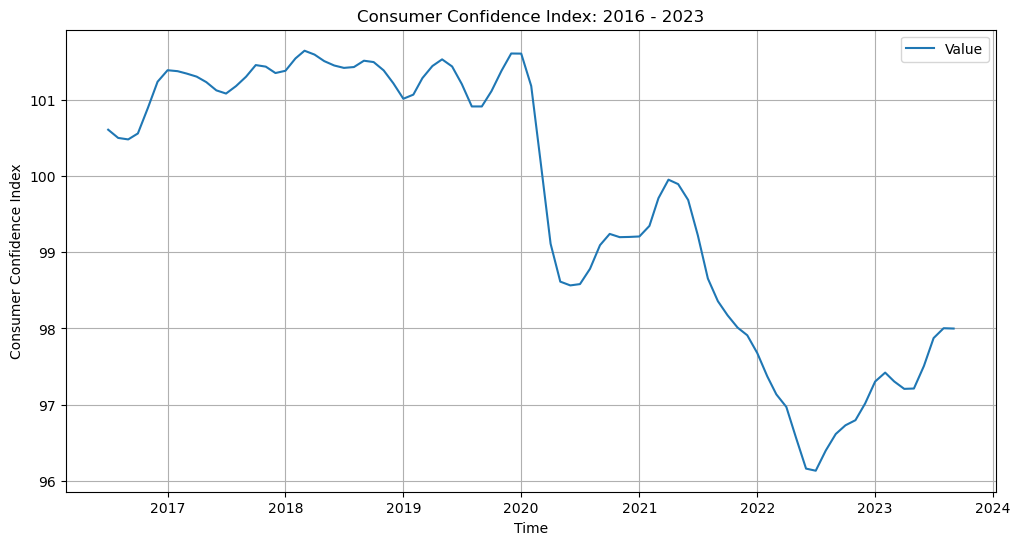

In [302]:
us_cci_data['Time'] = pd.to_datetime(us_cci_data['Time'])

# Set "Time" as the index for the time series
us_cci_data.set_index('Time', inplace=True)

# Create the time series plot
plt.figure(figsize=(12, 6))
plt.plot(us_cci_data.index, us_cci_data['Value'], label="Value")
plt.xlabel("Time")
plt.ylabel("Consumer Confidence Index")
plt.title("Consumer Confidence Index: 2016 - 2023")
plt.grid(True)
plt.legend()
plt.show()